# REGULARIZATION

In Machine Learning, we train our data and let it learn from it. When fitting our data points, our goal is to find the best fit when it can find all necessary patterns in our data and avoid random data points and unnecessary patterns called Noise. While training a machine learning model, the model can easily be overfitted or under fitted. To avoid this, we use regularization in machine learning to properly fit a model onto our test set.

Regularization: This is the technique that helps in avoiding overfitting and also it increasese model interpretability. This is a form of regression, that constrains / regularizes or shrinks the coefficient estimates towards zero. In addition, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. Further, Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

Overfitted Model: The model is not able to predict the output or target column for the unseen data by introducing noise in the output. When a Machine learning model tries to learn from the details along with the noise in the data and tries to fit each data point on the curve.

Underfitting model: When a Machine learning model can neither learn the relationship between variables in the testing data nor predict or classify a new data point.

"Noise" - this means those data points in the dataset which don't really represent the true properties of your data, but only due to a random chance.

Types of Regularization Techniques
1. Ridge Regression

Ridge Regression is also known as L-2 norm. It is one of the Regularization technique that is used to avoid overfitting or underfitting models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients. By changing the values of the penalty function, we are controlling the penalty term. The higher the penalty, it reduces the magnitude of coefficients. This technique shrinks the estimated coefficients towards zero. It seeks coefficient estimates that fit the data well, by making the RSS (Residual Sum of Squares) small.

2. Lasso Regression

Lasso Regression is also known as L-1 norm. It's a technique used to shrink all of the coefficients to exactly zero when the tuning parameter lambda is sufficiently large. Lasso Regression yields sparse models, modles that involve only a subset of the variables.

# Application on Dataset

We will use dataset that describes First year students GPA. The data set contains information about 219 randomly selected first-year students at a midwestern college. This dataset contains variables such as GPA(first year GPA), HSGPA(high school GPA), SATV, SATM, Male(an indicator variable for Male vs Female), HU, SS, White(an indicator variable for white student vs non white), FirstGen(an indicator variable for first-generation students), and CollegeBound.
We will be using GPA as our response veariable and other variables as predictors. Our main goals are;

1. Standardize independent variables if necessary.

2. Pull off some of the data to use as training data and some to use as test data. Set up a grid for λ (but here we will use alpha instead).

3.  Fit a ridge regression to the training data, then use cross-validation to choose the optimal value of λ. For this value of λ, calculate the test MSE on our test (validation) set. Record this test MSE, the value of λ, and the coefficients from the fitted ridge regression. Are any of the estimated coefficients 0? Is this what you would expect?

4. Repeat the previous bullet point for lasso regression.

5. Determine which variables are most important

Note: Lower RMSE and higher R-Squared values are indicative of a good model.


In [1]:
# Checking version for the numpy
# print(np.__version__)

In [2]:
# Checking version for pandas
# print(pd.__version__)

In [3]:
# updating pandas and numpy
!pip install pandas --upgrade
# c

Requirement already up-to-date: pandas in c:\users\vivia\anaconda3\lib\site-packages (1.3.5)


In [4]:
# importing libraries
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas.util.testing as tm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

C:\Users\vivia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Loading dataset
credit_card = pd.read_csv('Credit.csv')

In [6]:
# Looking at the first 5 column of the FirstYearGPA dataset
credit_card.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
# Looking at the dtype
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [8]:
# statistical summary
credit_card.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


# DATA VISUALIZATION

Data visualization helps us to see if there is any correlation between our predictor variables and the response variable. In our dataset, GPA is our response varibale and the rest are predictor variables. In our predictor variables, we can observe that some of them have dummy variables.

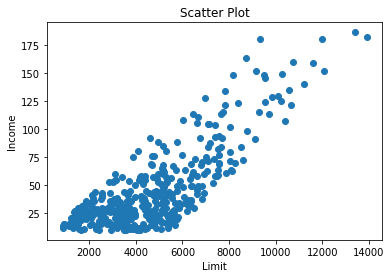

In [9]:
# Scatter plot with Limit against Income
plt.scatter(credit_card['Limit'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Limit')
plt.ylabel('Income')
  
plt.show()

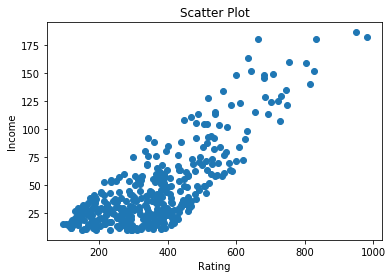

In [10]:
# Scatter plot with Rating against Income
plt.scatter(credit_card['Rating'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Rating')
plt.ylabel('Income')
  
plt.show()

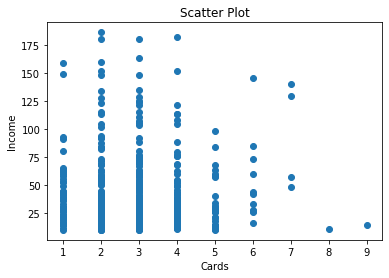

In [11]:
# Scatter plot with Cards against Income
plt.scatter(credit_card['Cards'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Cards')
plt.ylabel('Income')
  
plt.show()

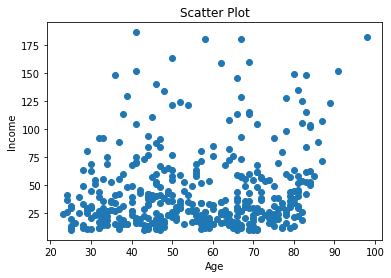

In [12]:
# Scatter plot with Age and Income
plt.scatter(credit_card['Age'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Age')
plt.ylabel('Income')
  
plt.show()

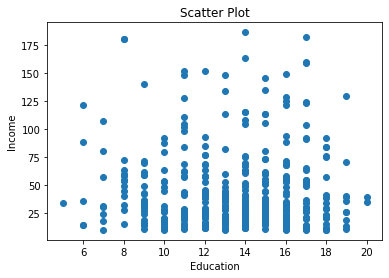

In [13]:
# Scatter plot with Education and Income
plt.scatter(credit_card['Education'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Education')
plt.ylabel('Income')
  
plt.show()

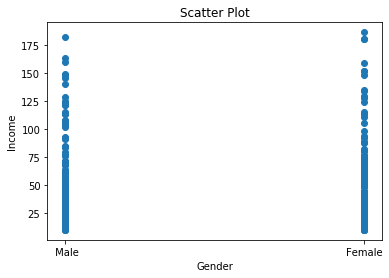

In [14]:
# Scatter plot with Gender and Income
plt.scatter(credit_card['Gender'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Gender')
plt.ylabel('Income')
  
plt.show()

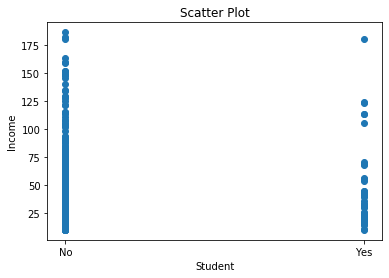

In [15]:
# Scatter plot with Student and Income
plt.scatter(credit_card['Student'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Student')
plt.ylabel('Income')
  
plt.show()

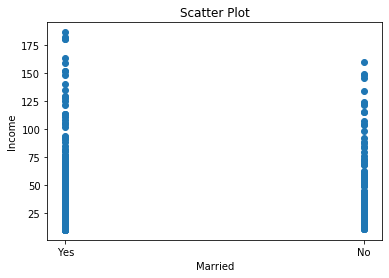

In [16]:
# Scatter plot with Married and Income
plt.scatter(credit_card['Married'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Married')
plt.ylabel('Income')
  
plt.show()

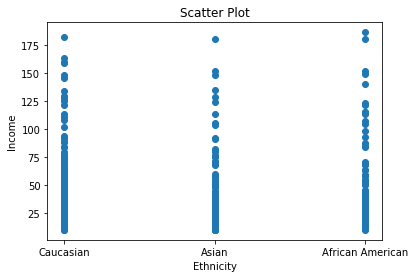

In [17]:
# Scatter plot with Ethnicity and Income
plt.scatter(credit_card['Ethnicity'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Ethnicity')
plt.ylabel('Income')
  
plt.show()

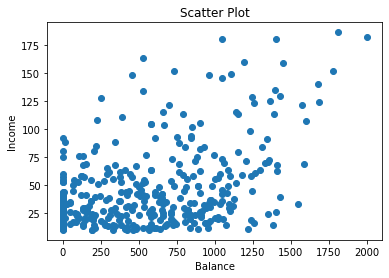

In [18]:
# Scatter plot with Balance and Income
plt.scatter(credit_card['Balance'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Balance')
plt.ylabel('Income')
  
plt.show()

# Standardizing Variables

This data set might have variables of different scale. In order for our models to perform well, we would need to have our variables scaled to avoid bias in the outcome. By Standardizing we tend to make the mean of the dataset as 0 and the standard deviation to 1.

Replacing categorical variables with 0 and 1. 

Gender: Female - 1, Male - 0

Student: Yes - 1 , No - 0

Married: Yes - 0, No - 0

Ethnicity: Caucacian - 0 , Asian - 1 , African America - 2

In [19]:
credit_card['Gender'] = pd.factorize(credit_card['Gender'])[0]
credit_card['Student'] = pd.factorize(credit_card['Student'])[0]
credit_card['Married'] = pd.factorize(credit_card['Married'])[0]
credit_card['Ethnicity'] = pd.factorize(credit_card['Ethnicity'])[0]
credit_card.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,0,0,0,0,333
1,2,106.025,6645,483,3,82,15,1,1,0,1,903
2,3,104.593,7075,514,4,71,11,0,0,1,1,580
3,4,148.924,9504,681,3,36,11,1,0,1,1,964
4,5,55.882,4897,357,2,68,16,0,0,0,0,331


In [20]:
#scale the data to have mean 0 stdev 1
credit_card_scaled = preprocessing.scale(credit_card)
credit_card_scaled = pd.DataFrame(credit_card)

We will build our model on the training set and evaluate its performance on the test set. This is called the holdout-validation approach for evaluating model performance.

X : independent variables (Other variables except Income)

y : dependent variables (Income)

The output shows that the shape of the training set has 280 observation of 10 variables and test set has 120 observation of 10 variables.

In [21]:
# Creating the training and Test datasets
#independent variable array
X = credit_card_scaled.iloc[:,2:12]

#dependent variable vector
y = credit_card_scaled.iloc[:,1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_train.shape)
print(X_test.shape)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

(280, 10)
(120, 10)


Ridge regression is to slove the problems in the regression caused by multicollinearity. We have to check for multicollinearity first. Here we will check for high variance inflation factors (VIFs). The rule of thumb is that a VIF>10 indicates multicollinearity.

In [22]:
#VIF Calculations
###Calculate VIF Factors
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns

print (vif.round(2))

   VIF Factor   features
0     1098.46      Limit
1     1247.41     Rating
2        8.31      Cards
3       10.76        Age
4       11.40  Education
5        2.03     Gender
6        1.57    Student
7        1.64    Married
8        1.83  Ethnicity
9       12.49    Balance


# Linear Regression

The simplest form of regression is linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution and are not correlated with each other (a problem called multi-collinearity).

The linear regression equation can be expressed in the following form:
y = a_1x_1 + a_2x_2 + a_3x_3 + ..... + a_x_n + b, where y is the target variable, x1, x2, x3, ... xn are the features, a1, a2, a3, ... an are the coefficients, and b is the parameter of the model.

The parameters a and b in the model are selected through the ordinary least squares (OLS) method. This method works by minimizing the sum of squares of residuals (actual value - predicted value).

Linear regression algorithm works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are large, they can lead to over-fitting on the training dataset, and such a model will not generalize well on the unseen test data. To overcome this shortcoming, we will do regularization as shown below, which penalizes large coefficients.

In [23]:
# Multiple Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Genereating prediction on test set
lm_train_pred = lm.predict(X_test)

# looking at scores for train and test set
print('lm score for train set',lm.score(X_train, y_train))
print('lm score for test set',lm.score(X_test, y_test))

# calculating Mean Squared Error (MSE)
mse = np.mean((lm_train_pred - y_test)**2)
print("MSE on test set: ", mse)

Lm_MAPE = MAPE(y_test,lm_train_pred)
print("MAPE value: ",Lm_MAPE)
Accuracy = 100 - Lm_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

# placing coefficients together with their corresponding variables names
lm_coeff = pd.DataFrame()
lm_coeff['Columns'] = X_train.columns
lm_coeff['Coefficient Estimate'] = pd.Series(lm.coef_)
print(lm_coeff)

lm score for train set 0.9037595734885717
lm score for test set 0.9088614506945417
MSE on test set:  126.26081831887761
MAPE value:  29.186327669189065
Accuracy of Linear Regression: 70.81%.
     Columns  Coefficient Estimate
0      Limit              0.019577
1     Rating              0.129101
2      Cards              1.378659
3        Age             -0.031614
4  Education             -0.071159
5     Gender             -0.709767
6    Student             39.962807
7    Married              0.623251
8  Ethnicity              0.445545
9    Balance             -0.094145


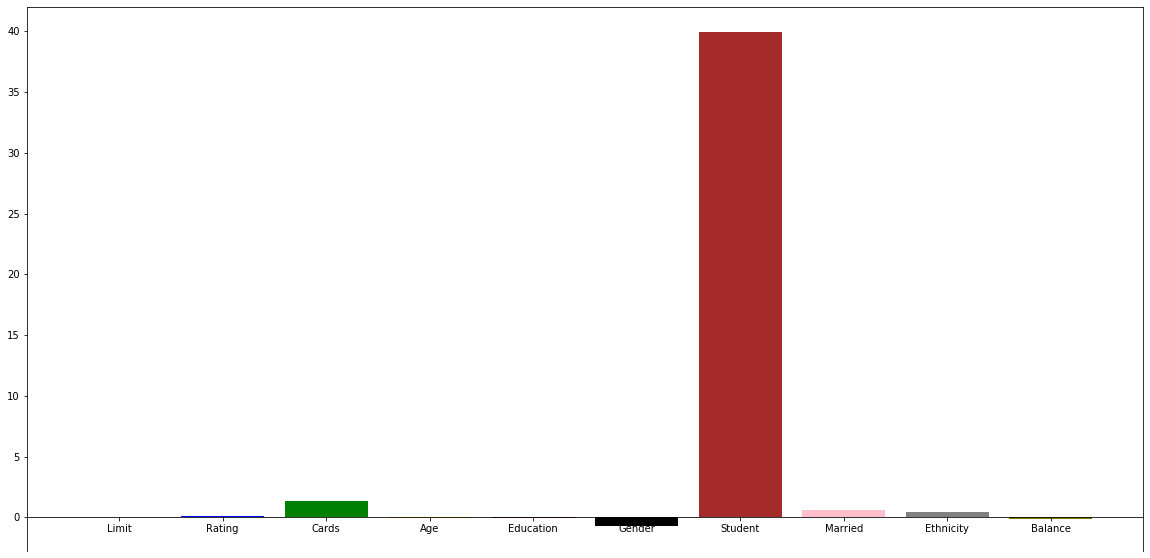

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

color = ["red", 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'grey', 'olive']

ax.bar(lm_coeff['Columns'], lm_coeff['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

# RIDGE REGRESSION

Ridge Regression is a model that analyses any data that seems to have multicollinearity. In ridge regression, we have a term lambda. This term is denoted by an alpha parameter in the ridge function. When the values of alpha changes then the penalty term is controlled. By using FirstYearGPA dataset, our y value will be the GPA of the student (response variable) and x will be the predictor variables. We expect coefficients that do not contribute to the model to be shrinked by letting them have smaller value.

The main goal is to obtain the mean squared error and observe if the estimated coefficients are 0. The mean Square error will show us the model error; thus, we want our MSE to be as small as possible. Also,we will calculate R-squared which measures the goodness of fit. R-squared measures the strength of the relationship between Ridge Regression model and the predictor variables.

R-squared of 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model. While, R-squared of 100% represents a model that explains all the variation in the response variable around its mean. For R-square we would want our result to have higher value.

Here we used different alpha values to check and see which model would give us a smaller RMSE and higher R-squared. Also, our models were normalized to have mean zero to avoid regularization biases of the model away from the data. In addition, we checked for the accuracy of the model. 

In [25]:
# Ridge regression model with an alpha value of 1
rr1 = Ridge(alpha=1, max_iter = 10, tol =0.1)

# fitting the model to the training data
rr1.fit(X_train, y_train) 

# Genereating prediction on test set
rr1_train_pred = rr1.predict(X_test)

# looking at scores for train and test set
print('lm score for train set',rr1.score(X_train, y_train))
print('lm score for test set',rr1.score(X_test, y_test))

# calculating Mean Squared Error (MSE)
mse = np.mean((rr1_train_pred - y_test)**2)
print("MSE on test set: ", mse)

rr1_MAPE = MAPE(y_test,rr1_train_pred)
print("MAPE value: ",rr1_MAPE)
Accuracy = 100 - rr1_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

# placing coefficients together with their corresponding variables names
rr1_coeff = pd.DataFrame()
rr1_coeff['Columns'] = X_train.columns
rr1_coeff['Coefficient Estimate'] = pd.Series(rr1.coef_)
print(rr1_coeff)

lm score for train set 0.9034973686523146
lm score for test set 0.9077263184199419
MSE on test set:  127.83339908720637
MAPE value:  29.60479396084912
Accuracy of Linear Regression: 70.40%.
     Columns  Coefficient Estimate
0      Limit              0.019167
1     Rating              0.131014
2      Cards              1.299292
3        Age             -0.026386
4  Education             -0.056288
5     Gender             -0.730295
6    Student             37.685676
7    Married              0.572683
8  Ethnicity              0.486715
9    Balance             -0.092551


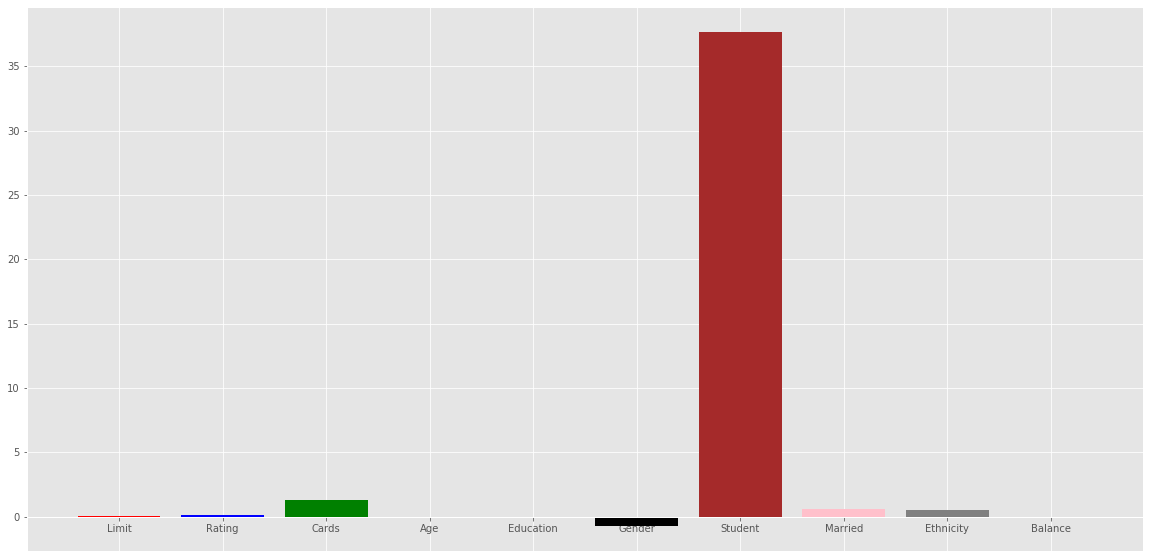

In [26]:
fig, ax = plt.subplots(figsize=(20,10))

color = ["red", 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'grey', 'olive']

ax.bar(rr1_coeff['Columns'], rr1_coeff['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

As we observe our results above, we see that Ridge regression has higher MSE than Linear regression. This tells us Linear regression is better model to make prediction compared to Ridge Regression. However, we can observe that Ridge regression has reduced error for our coefficients. For instance, our variable Student in Linear Regression model, we observe the coefficient is approximately about 39.96. On the other hand, in Ridge regression, we see that the coefficient of the same variable is approximately about 37.69.

# LASSO REGRESSION

Lasso stands for Least Absolute and Selection Operator which is know as the L-1 norm. Lasso regression is used to reduce the complexity of the model. Lasso regression is similar to Ridge regression except that the penalty term incudes the absolute weights instead of a square weights. In this technique, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs Feature selection and is said to yield sparse models.

In Lasso Regression, we will perfom similar analysis as Ridge Regression. Here our main goal is to see if Lasso Regression out perfoms Ridge Regression.

In [27]:
# Lasso Regression Model with an alpha value of 0.01
model_lasso = Lasso(alpha=1, max_iter = 10, tol =0.1)

# fitting the model to the training data
model_lasso.fit(X_train, y_train) 

# Genereating prediction on test set
model_lasso_train_pred = model_lasso.predict(X_test)

# looking at scores for train and test set
print('lm score for train set',model_lasso.score(X_train, y_train))
print('lm score for test set',model_lasso.score(X_test, y_test))

# calculating Mean Squared Error (MSE)
mse = np.mean((model_lasso_train_pred - y_test)**2)
print("MSE on test set: ", mse)

model_lasso_MAPE = MAPE(y_test,model_lasso_train_pred)
print("MAPE value: ",model_lasso_MAPE)
Accuracy = 100 - model_lasso_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

# placing coefficients together with their corresponding variables names
model_lasso_coeff = pd.DataFrame()
model_lasso_coeff['Columns'] = X_train.columns
model_lasso_coeff['Coefficient Estimate'] = pd.Series(model_lasso.coef_)
print(model_lasso_coeff)

lm score for train set 0.8706299513458261
lm score for test set 0.8644253760333737
MSE on test set:  187.8213236413143
MAPE value:  38.35744620106144
Accuracy of Linear Regression: 61.64%.
     Columns  Coefficient Estimate
0      Limit              0.023072
1     Rating              0.006010
2      Cards              0.510646
3        Age              0.047633
4  Education              0.000000
5     Gender             -0.000000
6    Student             17.117589
7    Married             -0.000000
8  Ethnicity              0.000000
9    Balance             -0.069772


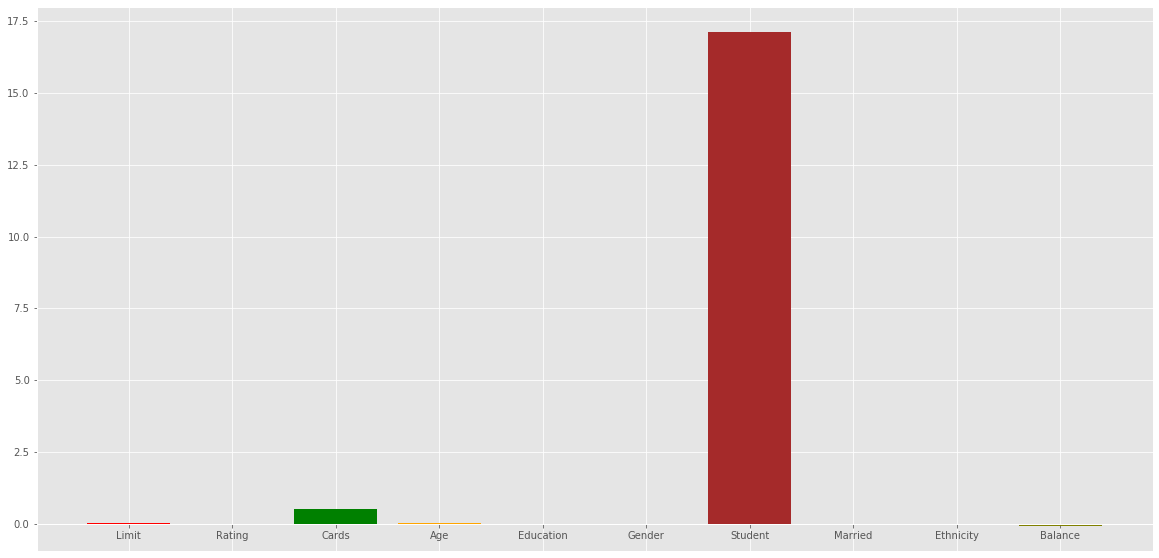

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

color = ["red", 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'grey', 'olive']

ax.bar(model_lasso_coeff['Columns'], model_lasso_coeff['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

From results of Lasso Regression, we observe that the MSE is higher than Ridge and Linear Regression. However, we can see that most of our coefficients are minimized to zero and coefficient with variable Student has decrease to approximately about 17.12. Therefore, we can conclude that Linear regression is our best model in making prediction of income in this dataset. In addition, the variable student can be seen as not an important variable in making predictions.